##### Let's talk about Game of thrones or shall I say Network of Thrones.

It is suprising right? What is the relationship between a fatansy TV show/novel and network science or python(it's not related to a dragon).

If you haven't heard of Game of Thrones, then you must be really good at hiding. Game of Thrones is the hugely popular television series by HBO based on the (also) hugely popular book series A Song of Ice and Fire by George R.R. Martin. In this notebook, we will analyze the co-occurrence network of the characters in the Game of Thrones books. Here, two characters are considered to co-occur if their names appear in the vicinity of 15 words from one another in the books.

![](images/got.png)

Andrew J. Beveridge, an associate professor of mathematics at Macalester College, and Jie Shan, an undergraduate created a network from the book A Storm of Swords by extracting relationships between characters to find out the most important characters in the book(or GoT).

The dataset is publicly avaiable for the 5 books at https://github.com/mathbeveridge/asoiaf. This is an interaction network and were created by connecting two characters whenever their names (or nicknames) appeared within 15 words of one another in one of the books. The edge weight corresponds to the number of interactions. 

Credits:

Original Notebook: https://ericmjl.github.io/Network-Analysis-Made-Simple/7-game-of-thrones-case-study-instructor.html

Blog: https://networkofthrones.wordpress.com

Math Horizons Article: https://www.maa.org/sites/default/files/pdf/Mathhorizons/NetworkofThrones%20%281%29.pdf

In [23]:
import pandas as pd

book1 = pd.read_csv('datasets/game_of_thrones_network/asoiaf-book1-edges.csv')
book1.head(10)

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1
5,Aemon-Targaryen-(Maester-Aemon),Bowen-Marsh,Undirected,4,1
6,Aemon-Targaryen-(Maester-Aemon),Chett,Undirected,9,1
7,Aemon-Targaryen-(Maester-Aemon),Clydas,Undirected,5,1
8,Aemon-Targaryen-(Maester-Aemon),Jeor-Mormont,Undirected,13,1
9,Aemon-Targaryen-(Maester-Aemon),Jon-Snow,Undirected,34,1


In [33]:
f = [item.strip().split(",") for item in open('datasets/game_of_thrones_network/asoiaf-book1-edges.csv').readlines()]
f[1]


In [53]:
#%%timeit
G1 = nx.Graph()

for item in f[1:]:
    G1.add_edge(item[0],item[1],weight=int(item[3]),book=int(item[4]))

In [41]:
%%timeit
edgeList = list()
G2 = nx.Graph()
for item in f[1:]:
    edgeList.append((item[0],item[1]))
    
G2.add_edges_from(edgeList)    

729 µs ± 35.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [39]:
edgeList[:10]

[('Addam-Marbrand', 'Jaime-Lannister'),
 ('Addam-Marbrand', 'Tywin-Lannister'),
 ('Aegon-I-Targaryen', 'Daenerys-Targaryen'),
 ('Aegon-I-Targaryen', 'Eddard-Stark'),
 ('Aemon-Targaryen-(Maester-Aemon)', 'Alliser-Thorne'),
 ('Aemon-Targaryen-(Maester-Aemon)', 'Bowen-Marsh'),
 ('Aemon-Targaryen-(Maester-Aemon)', 'Chett'),
 ('Aemon-Targaryen-(Maester-Aemon)', 'Clydas'),
 ('Aemon-Targaryen-(Maester-Aemon)', 'Jeor-Mormont'),
 ('Aemon-Targaryen-(Maester-Aemon)', 'Jon-Snow')]

In [37]:
G2.nodes

NodeView(('Addam-Marbrand', 'Jaime-Lannister', 'Tywin-Lannister', 'Aegon-I-Targaryen', 'Daenerys-Targaryen', 'Eddard-Stark', 'Aemon-Targaryen-(Maester-Aemon)', 'Alliser-Thorne', 'Bowen-Marsh', 'Chett', 'Clydas', 'Jeor-Mormont', 'Jon-Snow', 'Samwell-Tarly', 'Aerys-II-Targaryen', 'Brandon-Stark', 'Gerold-Hightower', 'Jon-Arryn', 'Robert-Baratheon', 'Aggo', 'Drogo', 'Jhogo', 'Jorah-Mormont', 'Quaro', 'Rakharo', 'Albett', 'Halder', 'Rast', 'Grenn', 'Pypar', 'Tyrion-Lannister', 'Alyn', 'Harwin', 'Jory-Cassel', 'Tomard', 'Arthur-Dayne', 'Arya-Stark', 'Benjen-Stark', 'Bran-Stark', 'Catelyn-Stark', 'Cersei-Lannister', 'Desmond', 'Ilyn-Payne', 'Jeyne-Poole', 'Joffrey-Baratheon', 'Meryn-Trant', 'Mordane', 'Mycah', 'Myrcella-Baratheon', 'Petyr-Baelish', 'Rickon-Stark', 'Robb-Stark', 'Rodrik-Cassel', 'Sandor-Clegane', 'Sansa-Stark', 'Syrio-Forel', 'Tommen-Baratheon', 'Vayon-Poole', 'Yoren', 'Arys-Oakheart', 'Balon-Greyjoy', 'Balon-Swann', 'Renly-Baratheon', 'Barristan-Selmy', 'Boros-Blount', 'Pyce

In [31]:
G1.edges

EdgeView([('Addam-Marbrand', 'Jaime-Lannister'), ('Addam-Marbrand', 'Tywin-Lannister'), ('Jaime-Lannister', 'Aerys-II-Targaryen'), ('Jaime-Lannister', 'Barristan-Selmy'), ('Jaime-Lannister', 'Brynden-Tully'), ('Jaime-Lannister', 'Catelyn-Stark'), ('Jaime-Lannister', 'Cersei-Lannister'), ('Jaime-Lannister', 'Eddard-Stark'), ('Jaime-Lannister', 'Edmure-Tully'), ('Jaime-Lannister', 'Galbart-Glover'), ('Jaime-Lannister', 'Gregor-Clegane'), ('Jaime-Lannister', 'Harys-Swyft'), ('Jaime-Lannister', 'Joffrey-Baratheon'), ('Jaime-Lannister', 'Jon-Arryn'), ('Jaime-Lannister', 'Jory-Cassel'), ('Jaime-Lannister', 'Kevan-Lannister'), ('Jaime-Lannister', 'Loras-Tyrell'), ('Jaime-Lannister', 'Lysa-Arryn'), ('Jaime-Lannister', 'Petyr-Baelish'), ('Jaime-Lannister', 'Renly-Baratheon'), ('Jaime-Lannister', 'Rickard-Karstark'), ('Jaime-Lannister', 'Robb-Stark'), ('Jaime-Lannister', 'Robert-Baratheon'), ('Jaime-Lannister', 'Rodrik-Cassel'), ('Jaime-Lannister', 'Sandor-Clegane'), ('Jaime-Lannister', 'Sansa-S

## Preliminaries

In [ ]:
!pip install networkx

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
#import nxviz as nv
from collections import Counter
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
# create empty network
G = nx.Graph()

In [4]:
G

In [8]:
# add one node with label '1'
G.add_node(1)

In [9]:
# add nodes from a list of elements
G.add_nodes_from(['Mary', 4, 'Alice', 'Mary'])

In [10]:
G.nodes

NodeView(('Mary', 4, 'Alice', 1))

In [18]:
# add single edge - tuple of nodes (source, target)
# this also adds nodes if they don't already exist
G.add_edge('Mary','Steven')
G.add_edge('Alice','Steven')


In [19]:
G.nodes, G.edges

(NodeView(('Mary', 4, 'Alice', 1, 'Steven')),
 EdgeView([('Mary', 'Steven'), ('Alice', 'Steven')]))

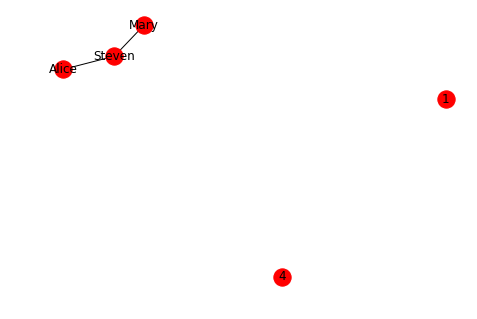

In [20]:
nx.draw(G, with_labels=True)

In [8]:
# add multiple of edges (list of tuples)
G.add_edges_from([('Mary', 'Steven') , ('Mary', 'Alice')])

In [9]:
# view edges in network G
G.edges

EdgeView([('Mary', 'Steven'), ('Mary', 'Alice')])

In [10]:
# remove edge
G.remove_edge('Mary','Alice')

In [11]:
# remove multiple edges (list of tuples)
G.remove_edges_from([('Mary', 'Steven') , ('Mary', 'Alice')])

In [6]:
# get number of nodes in network G
G.number_of_nodes()

3

In [7]:
# get number of edges in network G
G.number_of_edges()

0

In [22]:
# get Alice's number of neighbors (connections)
G.degree('Steven')

2

In [15]:
# empty the network
G.clear()

### Back to data

In [59]:
def read_csv(filname):
    f = [item.strip().split(",") for item in open(filname).readlines()]
    G_book = nx.Graph()
    for row in f[1:]:
        try:
            G_book.add_edge(row[0], row[1], weight=int(row[3]), book=int(row[4]))
        except ValueError:
            G_book.add_edge(row[0], row[1], weight=int(row[3]), book=0)
    return G_book

##### Let's load in the datasets

In [60]:
G_book1 = read_csv('datasets/game_of_thrones_network/asoiaf-book1-edges.csv')
G_book2 = read_csv('datasets/game_of_thrones_network/asoiaf-book2-edges.csv')
G_book3 = read_csv('datasets/game_of_thrones_network/asoiaf-book3-edges.csv')
G_book4 = read_csv('datasets/game_of_thrones_network/asoiaf-book4-edges.csv')
G_book5 = read_csv('datasets/game_of_thrones_network/asoiaf-book5-edges.csv')

The resulting DataFrame book1 has 5 columns: Source, Target, Type, weight, and book. Source and target are the two nodes that are linked by an edge. A network can have directed or undirected edges and in this network all the edges are undirected. The weight attribute of every edge tells us the number of interactions that the characters have had over the book, and the book column tells us the book number.



Once we have the data loaded as a pandas DataFrame, it's time to create a network. We create a graph for each book. It's possible to create one MultiGraph instead of 5 graphs, but it is easier to play with different graphs.

Let's populate the graph with edges from the pandas DataFrame.

In [15]:
G_book1.edges

EdgeView([('Addam-Marbrand', 'Jaime-Lannister'), ('Addam-Marbrand', 'Tywin-Lannister'), ('Jaime-Lannister', 'Aerys-II-Targaryen'), ('Jaime-Lannister', 'Barristan-Selmy'), ('Jaime-Lannister', 'Brynden-Tully'), ('Jaime-Lannister', 'Catelyn-Stark'), ('Jaime-Lannister', 'Cersei-Lannister'), ('Jaime-Lannister', 'Eddard-Stark'), ('Jaime-Lannister', 'Edmure-Tully'), ('Jaime-Lannister', 'Galbart-Glover'), ('Jaime-Lannister', 'Gregor-Clegane'), ('Jaime-Lannister', 'Harys-Swyft'), ('Jaime-Lannister', 'Joffrey-Baratheon'), ('Jaime-Lannister', 'Jon-Arryn'), ('Jaime-Lannister', 'Jory-Cassel'), ('Jaime-Lannister', 'Kevan-Lannister'), ('Jaime-Lannister', 'Loras-Tyrell'), ('Jaime-Lannister', 'Lysa-Arryn'), ('Jaime-Lannister', 'Petyr-Baelish'), ('Jaime-Lannister', 'Renly-Baratheon'), ('Jaime-Lannister', 'Rickard-Karstark'), ('Jaime-Lannister', 'Robb-Stark'), ('Jaime-Lannister', 'Robert-Baratheon'), ('Jaime-Lannister', 'Rodrik-Cassel'), ('Jaime-Lannister', 'Sandor-Clegane'), ('Jaime-Lannister', 'Sansa-S

In [70]:
books = [G_book1, G_book2, G_book3, G_book4, G_book5]

Let's have a look at these edges.

In [39]:
list(G_book1.edges(data=True))[16]

('Jaime-Lannister', 'Loras-Tyrell', {'weight': 3, 'book': 1})

In [18]:
list(G_book1.edges(data=True))[400]

('Benjen-Stark', 'Theon-Greyjoy', {'weight': 4, 'book': 1})

### Finding the most important node i.e character in these networks.

Is it Jon Snow, Tyrion, Daenerys, or someone else? Let's see! Network Science offers us many different metrics to measure the importance of a node in a network as we saw in the first part of the tutorial. Note that there is no "correct" way of calculating the most important node in a network, every metric has a different meaning.

First, let's measure the importance of a node in a network by looking at the number of neighbors it has, that is, the number of nodes it is connected to. For example, an influential account on Twitter, where the follower-followee relationship forms the network, is an account which has a high number of followers. This measure of importance is called degree centrality.

Using this measure, let's extract the top ten important characters from the first book (book[0]) and the fifth book (book[4]).

In [41]:
deg_cen_book1 = nx.degree_centrality(books[0])

### Degree Centrality 
$ \frac{k}{N-1} $

In [68]:
degCent = dict()
for item in G_book1.nodes:
    degCent[item] = G_book1.degree(item)/(len(G_book1.nodes)-1)

In [69]:
degCent

{'Addam-Marbrand': 0.010752688172043012,
 'Jaime-Lannister': 0.15591397849462366,
 'Tywin-Lannister': 0.11827956989247312,
 'Aegon-I-Targaryen': 0.010752688172043012,
 'Daenerys-Targaryen': 0.11290322580645161,
 'Eddard-Stark': 0.3548387096774194,
 'Aemon-Targaryen-(Maester-Aemon)': 0.03763440860215054,
 'Alliser-Thorne': 0.053763440860215055,
 'Bowen-Marsh': 0.026881720430107527,
 'Chett': 0.016129032258064516,
 'Clydas': 0.005376344086021506,
 'Jeor-Mormont': 0.06989247311827956,
 'Jon-Snow': 0.1989247311827957,
 'Samwell-Tarly': 0.06451612903225806,
 'Aerys-II-Targaryen': 0.03225806451612903,
 'Brandon-Stark': 0.03225806451612903,
 'Gerold-Hightower': 0.026881720430107527,
 'Jon-Arryn': 0.08064516129032258,
 'Robert-Baratheon': 0.26881720430107525,
 'Aggo': 0.03225806451612903,
 'Drogo': 0.10215053763440861,
 'Jhogo': 0.03225806451612903,
 'Jorah-Mormont': 0.06989247311827956,
 'Quaro': 0.026881720430107527,
 'Rakharo': 0.026881720430107527,
 'Albett': 0.016129032258064516,
 'Halder

In [57]:
len(list(books[0].neighbors("Addam-Marbrand")))/(len(books[0].nodes)-1)

NameError: name 'books' is not defined

In [75]:
%%timeit
degCent = dict()
for item in G_book1.nodes:
    degCent[item] = G_book1.degree(item)/(len(G_book1.nodes)-1)

315 µs ± 5.44 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [76]:
%%timeit
deg_cen_book1 = nx.degree_centrality(G_book1)

47.8 µs ± 454 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [21]:
sorted(deg_cen_book1.items(), key=lambda x:x[1], reverse=True)[0:10]

[('Eddard-Stark', 0.3548387096774194),
 ('Robert-Baratheon', 0.2688172043010753),
 ('Tyrion-Lannister', 0.24731182795698928),
 ('Catelyn-Stark', 0.23118279569892475),
 ('Jon-Snow', 0.19892473118279572),
 ('Robb-Stark', 0.18817204301075272),
 ('Sansa-Stark', 0.18817204301075272),
 ('Bran-Stark', 0.17204301075268819),
 ('Cersei-Lannister', 0.16129032258064518),
 ('Joffrey-Baratheon', 0.16129032258064518)]

In [71]:
sorted(degCent.items(), key=lambda x:x[1], reverse=True)[0:10]

[('Eddard-Stark', 0.3548387096774194),
 ('Robert-Baratheon', 0.26881720430107525),
 ('Tyrion-Lannister', 0.24731182795698925),
 ('Catelyn-Stark', 0.23118279569892472),
 ('Jon-Snow', 0.1989247311827957),
 ('Robb-Stark', 0.1881720430107527),
 ('Sansa-Stark', 0.1881720430107527),
 ('Bran-Stark', 0.17204301075268819),
 ('Cersei-Lannister', 0.16129032258064516),
 ('Joffrey-Baratheon', 0.16129032258064516)]

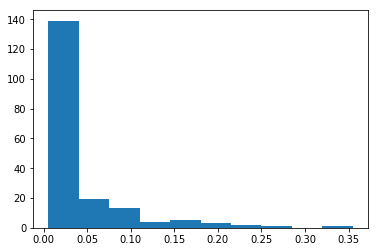

In [77]:
# Plot a histogram of degree centrality
plt.hist(list(nx.degree_centrality(G_book1).values()))
plt.show()

### Exercise

Create a new centrality measure, weighted_degree(Graph, weight) which takes in Graph and the weight attribute and returns a weighted degree dictionary. Weighted degree is calculated by summing the weight of the all edges of a node and find the top five characters according to this measure. [5 mins]

In [78]:
def weighted_degree(G, weight):
    result = dict()
    for node in G.nodes():
        weight_degree = 0
        for n in G.edges([node], data=True):
            weight_degree += ____________
        result[node] = weight_degree
    return result

In [91]:
result = dict()
for node in G_book1.nodes():
    weight_degree = 0
    for n in G_book1.edges([node], data=True):
        weight_degree += n[2]["weight"]
    result[node] = weight_degree

In [92]:
result

{'Addam-Marbrand': 9,
 'Jaime-Lannister': 241,
 'Tywin-Lannister': 181,
 'Aegon-I-Targaryen': 9,
 'Daenerys-Targaryen': 443,
 'Eddard-Stark': 1284,
 'Aemon-Targaryen-(Maester-Aemon)': 74,
 'Alliser-Thorne': 80,
 'Bowen-Marsh': 28,
 'Chett': 19,
 'Clydas': 5,
 'Jeor-Mormont': 181,
 'Jon-Snow': 784,
 'Samwell-Tarly': 148,
 'Aerys-II-Targaryen': 37,
 'Brandon-Stark': 41,
 'Gerold-Hightower': 17,
 'Jon-Arryn': 169,
 'Robert-Baratheon': 941,
 'Aggo': 36,
 'Drogo': 256,
 'Jhogo': 43,
 'Jorah-Mormont': 154,
 'Quaro': 21,
 'Rakharo': 24,
 'Albett': 11,
 'Halder': 56,
 'Rast': 26,
 'Grenn': 85,
 'Pypar': 107,
 'Tyrion-Lannister': 650,
 'Alyn': 32,
 'Harwin': 18,
 'Jory-Cassel': 152,
 'Tomard': 42,
 'Arthur-Dayne': 4,
 'Arya-Stark': 430,
 'Benjen-Stark': 104,
 'Bran-Stark': 531,
 'Catelyn-Stark': 520,
 'Cersei-Lannister': 424,
 'Desmond': 7,
 'Ilyn-Payne': 43,
 'Jeyne-Poole': 54,
 'Joffrey-Baratheon': 422,
 'Meryn-Trant': 36,
 'Mordane': 141,
 'Mycah': 50,
 'Myrcella-Baratheon': 54,
 'Petyr-Bael

In [ ]:
plt.hist(___________)
plt.show()

In [ ]:
sorted(weighted_degree(G_book1, 'weight').items(), key=lambda x:x[1], reverse=True)[0:10]

### Let's do this for Betweeness centrality and check if this makes any difference

Haha, evil laugh

In [51]:
# First check unweighted, just the structure

sorted(nx.betweenness_centrality(G_book1).items(), key=lambda x:x[1], reverse=True)[0:10]

[('Eddard-Stark', 0.2696038913836117),
 ('Robert-Baratheon', 0.21403028397371796),
 ('Tyrion-Lannister', 0.1902124972697492),
 ('Jon-Snow', 0.17158135899829566),
 ('Catelyn-Stark', 0.1513952715347627),
 ('Daenerys-Targaryen', 0.08627015537511595),
 ('Robb-Stark', 0.07298399629664767),
 ('Drogo', 0.06481224290874964),
 ('Bran-Stark', 0.05579958811784442),
 ('Sansa-Stark', 0.03714483664326785)]

In [61]:
# Let's care about interactions now

sorted(nx.betweenness_centrality(G_book5, weight='weight').items(), key=lambda x:x[1], reverse=True)[0:10]

[('Stannis-Baratheon', 0.36406677465146403),
 ('Daenerys-Targaryen', 0.25381750424245914),
 ('Jon-Snow', 0.20565214271362542),
 ('Robert-Baratheon', 0.20012876291658696),
 ('Asha-Greyjoy', 0.1739937522125587),
 ('Tyrion-Lannister', 0.15869758899596131),
 ('Cersei-Lannister', 0.14384539416335676),
 ('Godry-Farring', 0.1043978491537262),
 ('Tywin-Lannister', 0.09652381909163119),
 ('Barristan-Selmy', 0.08378527808003416)]

### So what's up with  Stannis Baratheon?

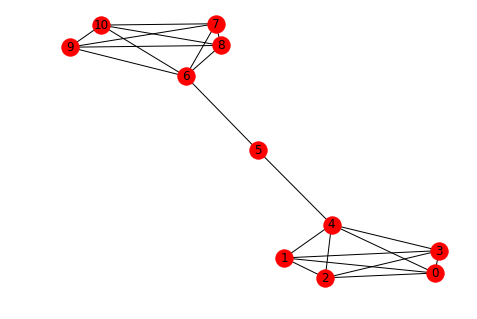

In [57]:
nx.draw(nx.barbell_graph(5, 1), with_labels=True)

In [62]:
sorted(nx.degree_centrality(G_book5).items(), key=lambda x:x[1], reverse=True)[:5]

[('Jon-Snow', 0.1962025316455696),
 ('Daenerys-Targaryen', 0.18354430379746836),
 ('Stannis-Baratheon', 0.14873417721518986),
 ('Tyrion-Lannister', 0.10443037974683544),
 ('Theon-Greyjoy', 0.10443037974683544)]

In [98]:
sorted(nx.betweenness_centrality(G_book5).items(), key=lambda x:x[1], reverse=True)[:5]

[('Stannis-Baratheon', 0.45283060689247934),
 ('Daenerys-Targaryen', 0.2959459062106149),
 ('Jon-Snow', 0.24484873673158666),
 ('Tyrion-Lannister', 0.20961613179551256),
 ('Robert-Baratheon', 0.17716906651536968)]

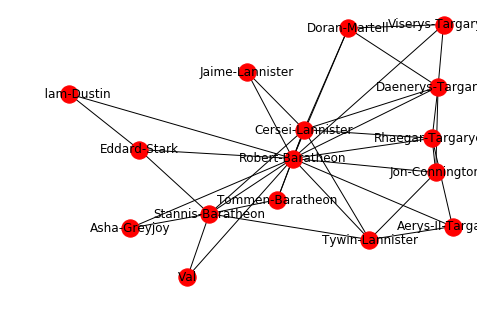

In [100]:
nx.draw(nx.ego_graph(G_book5,'Robert-Baratheon',radius=1),with_labels=True)

#### PageRank
The billion dollar algorithm, PageRank works by counting the number and quality of links to a page to determine a rough estimate of how important the website is. The underlying assumption is that more important websites are likely to receive more links from other websites.

In [53]:
# by default weight attribute in pagerank is weight, so we use weight=None to find the unweighted results
sorted(nx.pagerank_numpy(G_book1, weight=None).items(), key=lambda x:x[1], reverse=True)[0:10]

[('Eddard-Stark', 0.045520792228306683),
 ('Tyrion-Lannister', 0.033013624624932625),
 ('Catelyn-Stark', 0.030193105286631897),
 ('Robert-Baratheon', 0.029834742227736733),
 ('Jon-Snow', 0.02683449952206622),
 ('Robb-Stark', 0.021562941297247486),
 ('Sansa-Stark', 0.02000803404286462),
 ('Bran-Stark', 0.019945786786238335),
 ('Jaime-Lannister', 0.01750784720284688),
 ('Cersei-Lannister', 0.017082604584758063)]

In [54]:
sorted(nx.pagerank_numpy(G_book1, weight='weight').items(), key=lambda x:x[1], reverse=True)[0:10]

[('Eddard-Stark', 0.07239401100498236),
 ('Robert-Baratheon', 0.048517275705099346),
 ('Jon-Snow', 0.04770689062474915),
 ('Tyrion-Lannister', 0.04367437892706293),
 ('Catelyn-Stark', 0.03466703470130739),
 ('Bran-Stark', 0.029774200539800223),
 ('Robb-Stark', 0.029216183645196857),
 ('Daenerys-Targaryen', 0.027089622513021133),
 ('Sansa-Stark', 0.02696177891568312),
 ('Cersei-Lannister', 0.021631679397418935)]

## Evolution of importance of characters over the books

According to degree centrality the most important character in the first book is Eddard Stark but he is not even in the top 10 of the fifth book. The importance changes over the course of five books, because you know stuff happens ;)

Let's look at the evolution of degree centrality of a couple of characters like Eddard Stark, Jon Snow, Tyrion which showed up in the top 10 of degree centrality in first book.

We create a dataframe with character columns and index as books where every entry is the degree centrality of the character in that particular book and plot the evolution of degree centrality Eddard Stark, Jon Snow and Tyrion.
We can see that the importance of Eddard Stark in the network dies off and with Jon Snow there is a drop in the fourth book but a sudden rise in the fifth book

In [103]:
books = [G_book1,G_book2,G_book3,G_book4,G_book5]

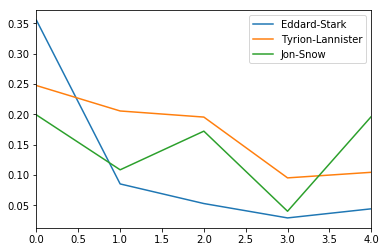

In [104]:
evol = [nx.degree_centrality(book) for book in books]
evol_df = pd.DataFrame.from_records(evol).fillna(0)
evol_df[['Eddard-Stark', 'Tyrion-Lannister', 'Jon-Snow']].plot()

In [81]:
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(evol_df.T[i].sort_values(ascending=False)[0:5].index))
set_of_char

{'Arya-Stark',
 'Brienne-of-Tarth',
 'Catelyn-Stark',
 'Cersei-Lannister',
 'Daenerys-Targaryen',
 'Eddard-Stark',
 'Jaime-Lannister',
 'Joffrey-Baratheon',
 'Jon-Snow',
 'Margaery-Tyrell',
 'Robb-Stark',
 'Robert-Baratheon',
 'Sansa-Stark',
 'Stannis-Baratheon',
 'Theon-Greyjoy',
 'Tyrion-Lannister'}

##### Exercise

Plot the evolution of weighted degree centrality of the above mentioned characters over the 5 books, and repeat the same exercise for betweenness centrality.

In [ ]:
evol_df[__________].plot(figsize=(29,15))

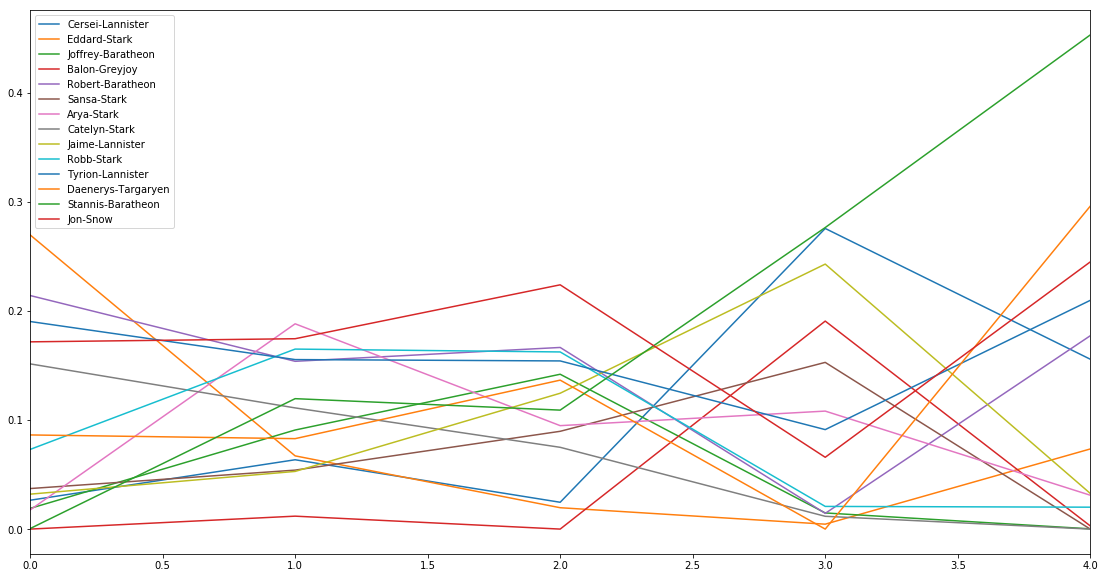

In [105]:
evol = [nx.betweenness_centrality(graph) for graph in books]
evol_df = pd.DataFrame.from_records(evol).fillna(0)

set_of_char = set()
for i in range(5):
    set_of_char |= set(list(evol_df.T[i].sort_values(ascending=False)[0:5].index))


evol_df[list(set_of_char)].plot(figsize=(19,10))

#### Community detection in Networks
A network is said to have community structure if the nodes of the network can be easily grouped into (potentially overlapping) sets of nodes such that each set of nodes is densely connected internally.

We will use louvain community detection algorithm to find the modules in our graph.

In [ ]:
partition = community.best_partition(G_book1)
size = float(len(set(partition.values())))
pos = nx.spring_layout(G_book1)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G_book1, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G_book1, pos, alpha=0.5)
plt.show()

In [ ]:
d = {}
for character, par in partition.items():
    if par in d:
        d[par].append(character)
    else:
        d[par] = [character]
d

In [ ]:
nx.draw(nx.subgraph(G_book1, d[3]))

In [ ]:
nx.draw(nx.subgraph(G_book1, d[1]))

In [ ]:
nx.density(G_book1)

In [ ]:
nx.density(nx.subgraph(G_book1, d[4]))

#### Exercise 

Find the most important node in the partitions according to degree centrality of the nodes.

In [ ]:
max_d = {}
deg_book1 = nx.degree_centrality(G_book1)

for ______ in d:
    temp = 0
    for _______ in d[group]:
        if deg_book1[_______] > temp:
            max_d[______] = _______
            temp = deg_book1[_______]

In [ ]:
nx.density(nx.subgraph(G_book1, d[4]))/nx.density(G_book1)

In [ ]:
max_d

In [16]:
# input edgelist from file
G = nx.read_edgelist("datafiles/social/facebook/fb.txt")

In [17]:
# get the 2nd node's neighbors (retrieves a dictionary)
dict_neighbors = G.neighbors('2')

In [18]:
list(dict_neighbors)

['1',
 '3',
 '7',
 '9',
 '11',
 '12',
 '16',
 '17',
 '18',
 '23',
 '51',
 '53',
 '479',
 '1079',
 '1132',
 '1237',
 '1645',
 '2053',
 '2054',
 '2055',
 '2056',
 '2057',
 '2058',
 '2059',
 '2060',
 '2061']

In [19]:
# number of total nodes in graph
len(G.nodes)

63731

In [20]:
# number of total edges in graph
len(G.edges)

817035

In [21]:
nx.degree_assortativity_coefficient(G)

0.17701535770918256

In [22]:
nx.degree_pearson_correlation_coefficient(G)

0.17701535770918214

In [31]:
G.clear()

### 2. Network Types 

#### a. Weighted Graphs

**Edge weight.** Consider that the edge that you are adding should contain additional information, such as the strength of the connection. This would be important, for example, when analyzing communication networks to check friendship/connectivity strength. You want to capture how many times they exchanged e-mails, calls, text messages, to indicate the strength of the connection. For this you will assign weights to the edge, values that can be the number of communications, or the fraction of communications, normalized.

In [35]:
# assign weight to edge
G.add_edge('Mary','Steven', weight=5)

In [36]:
G.edges

EdgeView([('Mary', 'Steven')])

In [38]:
# access edge properties
G['Mary']['Steven']

{'weight': 5}

In [39]:
# change edge weight
G['Mary']['Steven']['weight'] = 1

In [41]:
nx.reciprocity(G)

0.0

#### b. Directed Graphs

**Edge direction.** Edges have direction describing source -> target node relationship.

In [42]:
#undirected
G.nodes

NodeView(('Mary', 'Steven'))

In [43]:
dg = nx.DiGraph()

In [44]:
# you can create an undirected representation of network G
nx.to_undirected(G)

In [45]:
# you can create a directed representation of network G
dg = nx.to_directed(G)

In [46]:
nx.reciprocity(dg)

1.0

In [47]:
dg.edges

OutEdgeView([('Mary', 'Steven'), ('Steven', 'Mary')])

#### c. Multigraphs

Many algorithms are not well defined on such graphs. Therefore, you should convert such graphs rather to a standard graph in a way that makes the measurement well defined.

In [48]:
# multigraphs can store multiple edges information between same two nodes that can have different properties
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 3.0), (1, 2, 75), (2, 3, 5), (1, 2, 4.2)])

In [49]:
# lists the edges (node1, node2, edge_index), including the multiedges, adding the multiedge index as 3rd element in edge tuple
MG.edges

MultiEdgeView([(1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 3, 0)])

In [50]:
# lists the edges (node1, node2, weight/edge_attribute), the 3rd element is the weights of the edges
MG.edges.data('weight')

MultiEdgeDataView([(1, 2, 3.0), (1, 2, 75), (1, 2, 4.2), (2, 3, 5)])

In [51]:
MG.edges.data()

MultiEdgeDataView([(1, 2, {'weight': 3.0}), (1, 2, {'weight': 75}), (1, 2, {'weight': 4.2}), (2, 3, {'weight': 5})])

In [52]:
# check the weight of an edge
MG[1][2]

AtlasView({0: {'weight': 3.0}, 1: {'weight': 75}, 2: {'weight': 4.2}})

## A bit about power law in networks


In [ ]:
G_random = nx.erdos_renyi_graph(100, 0.1)

In [ ]:
nx.draw(G_random)

In [ ]:
G_ba = nx.barabasi_albert_graph(100, 2)

In [ ]:
nx.draw(G_ba)

In [ ]:
# Plot a histogram of degree centrality
plt.hist(list(nx.degree_centrality(G_random).values()))
plt.show()

In [ ]:
plt.hist(list(nx.degree_centrality(G_ba).values()))
plt.show()

In [ ]:
G_random = nx.erdos_renyi_graph(2000, 0.2)
G_ba = nx.barabasi_albert_graph(2000, 20)

In [ ]:
d = {}
for i, j in dict(nx.degree(G_random)).items():
    if j in d:
        d[j] += 1
    else:
        d[j] = 1
x = np.log2(list((d.keys())))
y = np.log2(list(d.values()))
plt.scatter(x, y, alpha=0.9)
plt.show()

In [ ]:
d = {}
for i, j in dict(nx.degree(G_ba)).items():
    if j in d:
        d[j] += 1
    else:
        d[j] = 1
x = np.log2(list((d.keys())))
y = np.log2(list(d.values()))
plt.scatter(x, y, alpha=0.9)
plt.show()